In [3]:
!pip install networkx
!pip install fibheap

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import random
import numpy as np
import math
import networkx as nx
import fibheap
import matplotlib.pyplot as plt


# requires networkx and fibheap

In [2]:
# Function to generate random coordinates for N stops in LxL area
def generate_stops(N, L):
    # return {i: (random.uniform(0, L), random.uniform(0, L)) for i in range(N)}
    return np.random.uniform(0, L, (N, 2)) 

# Function to compute Euclidean distance
def euclidean_distance(node_1, node_2):
    return np.linalg.norm(node_1-node_2)

# Create a graph with weighted edges
def create_graph(stops):
    N = stops.shape[0]
    G = nx.Graph()
    for i in range(N):
        G.add_node(i, pos=stops[i])
    for i in range(N):
        for j in range(i+1, N):                                       #fior j in range(N) and if(j!=n)
            dist = euclidean_distance(stops[i], stops[j])
            G.add_edge(i, j, weight=dist)
    return G

# Dijkstra's algorithm using Fibonacci heap
def dijkstra_fib_heap(graph, start, end):
    fib_heap = fibheap.Fheap()
    distances = {node: float('inf') for node in graph.nodes}
    predecessors = {node: None for node in graph.nodes}
    heap_nodes = {}

    distances[start] = 0

    # Create and insert nodes into the Fibonacci heap
    for node in graph.nodes:
        heap_nodes[node] = fibheap.Node(float('inf'))  # Create a Fibonacci heap node
        fib_heap.insert(heap_nodes[node])  # Insert the node into the heap

    # Decrease key for the start node
    fib_heap.decrease_key(heap_nodes[start], 0)

    while fib_heap.num_nodes > 0:
        u_node = fib_heap.extract_min()  # Extract the minimum node
        u = None

        # Find which node this corresponds to
        for key, heap_node in heap_nodes.items():
            if heap_node is u_node:
                u = key
                break

        if u is None:
            continue  # Shouldn't happen, but safety check

        if u == end:
            break

        for v in graph.neighbors(u):
            weight = graph[u][v]['weight']
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u
                fib_heap.decrease_key(heap_nodes[v], distances[v])

    # Reconstruct shortest path
    path = []
    while end is not None:
        path.append(end)
        end = predecessors[end]

    return path[::-1], distances[path[0]]

#Visualisation of path
def plot_graph(graph, stops, path):
    plt.figure(figsize=(8, 8))
    pos = {i: stops[i] for i in range(len(stops))}

    # Draw the full graph
    nx.draw(graph, pos, node_color='lightgray', with_labels=True, edge_color='gray')

    # Highlight the shortest path dynamically
    for i in range(len(path) - 1):
        nx.draw_networkx_edges(graph, pos, edgelist=[(path[i], path[i + 1])], width=3, edge_color='r')
        plt.pause(0.5)  # Pause for animation effect

    plt.show()

In [14]:
#Create Map
N, L = 5, 5
stops = generate_stops(N, L)
graph = create_graph(stops)

Shortest path from 1 to 0: [1, np.int64(0)] with distance 5.058528797427046


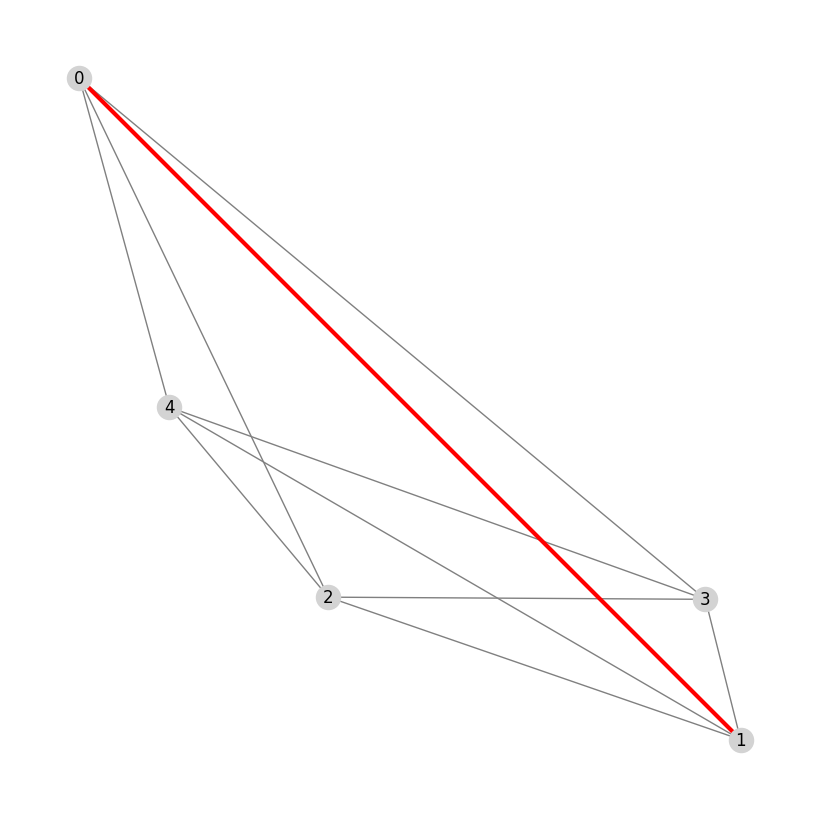

In [15]:
start, end = np.random.randint(0, N, 2) 
path, distance = dijkstra_fib_heap(graph, start, end)

print(f"Shortest path from {start} to {end}: {path} with distance {distance}")
plt.show()

### ALPHA VERSION

In [5]:
# Function to generate random stops (nodes)
def generate_stops(N, L):
    return np.random.uniform(0, L, (N, 2))

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Function to create a random graph (sparse web of connections)
def create_random_network(stops, probability=L/N):
    G = nx.Graph()
    N = stops.shape[0]
    for i in range(N):
        G.add_node(i, pos=stops[i])  # Store node positions
    for i in range(N):
        for j in range(i + 1, N):
            # Randomly decide whether to add an edge between nodes i and j
            if np.random.rand() < probability:
                dist = euclidean_distance(stops[i], stops[j])
                G.add_edge(i, j, weight=dist)  # Connect i and j if random check passes
    return G

# Dijkstra using Fibonacci Heap
def dijkstra_fib_heap(graph, start, end):
    
    #Check if Start or End Node is Isolated
    if graph.degree(start) == 0 or graph.degree(end) == 0:
        print(f"No path possible: Node {start} or {end} is isolated.")
        return None, float('inf')
    
    
    fib_heap = fibheap.Fheap()
    distances = {node: float('inf') for node in graph.nodes}
    predecessors = {node: None for node in graph.nodes}
    heap_nodes = {}

    distances[start] = 0

    # Create and insert nodes into Fibonacci heap
    for node in graph.nodes:
        heap_nodes[node] = fibheap.Node(float('inf'))
        fib_heap.insert(heap_nodes[node])

    fib_heap.decrease_key(heap_nodes[start], 0)

    while fib_heap.num_nodes > 0:
        u_node = fib_heap.extract_min()
        u = None

        for key, heap_node in heap_nodes.items():
            if heap_node is u_node:
                u = key
                break

        if u is None:
            continue

        if u == end:
            break

        for v in graph.neighbors(u):
            weight = graph[u][v]['weight']
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u
                fib_heap.decrease_key(heap_nodes[v], distances[v])

    # Reconstruct shortest path
    path = []
    while end is not None:
        path.append(end)
        end = predecessors[end]

    return path[::-1], distances[path[0]]

# Interactive Plotting
def plot_network(graph, stops, path=None):
    plt.figure(figsize=(8, 8))
    pos = {i: stops[i] for i in range(len(stops))}

    # Draw the full graph with all edges
    nx.draw(graph, pos, node_color='lightgray', with_labels=True, edge_color='gray')

    # If path is provided, highlight the shortest path in red
    if path is not None and len(path) > 1:
        path_edges = [(path[z], path[z + 1]) for z in range(len(path) - 1)]
        nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='red')
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, width=3, edge_color='r')
        plt.title('Shortest Path Through Network')
    plt.show()

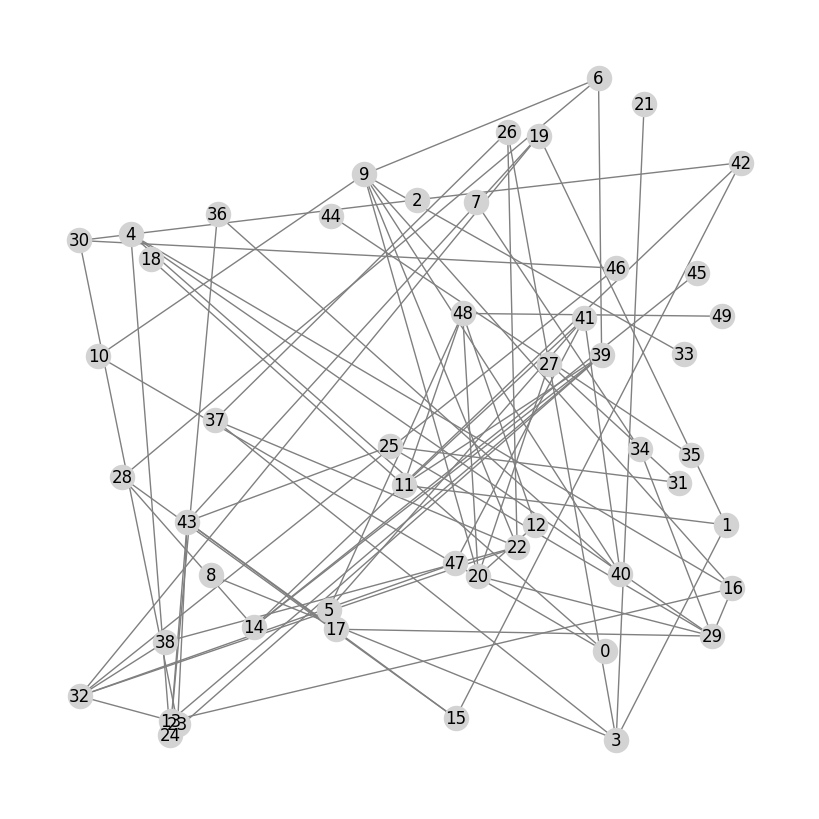

In [6]:
# Main Execution
N, L = 50, 1e4  # Number of stops and area size
stops = generate_stops(N, L)
G = create_random_network(stops, probability=np.sqrt(N/L))  # Connection Propability: Decreses with N 
plot_network(G, stops)

Shortest Path from 46 to 33: [46, 32, 22, 9, np.int64(33)]


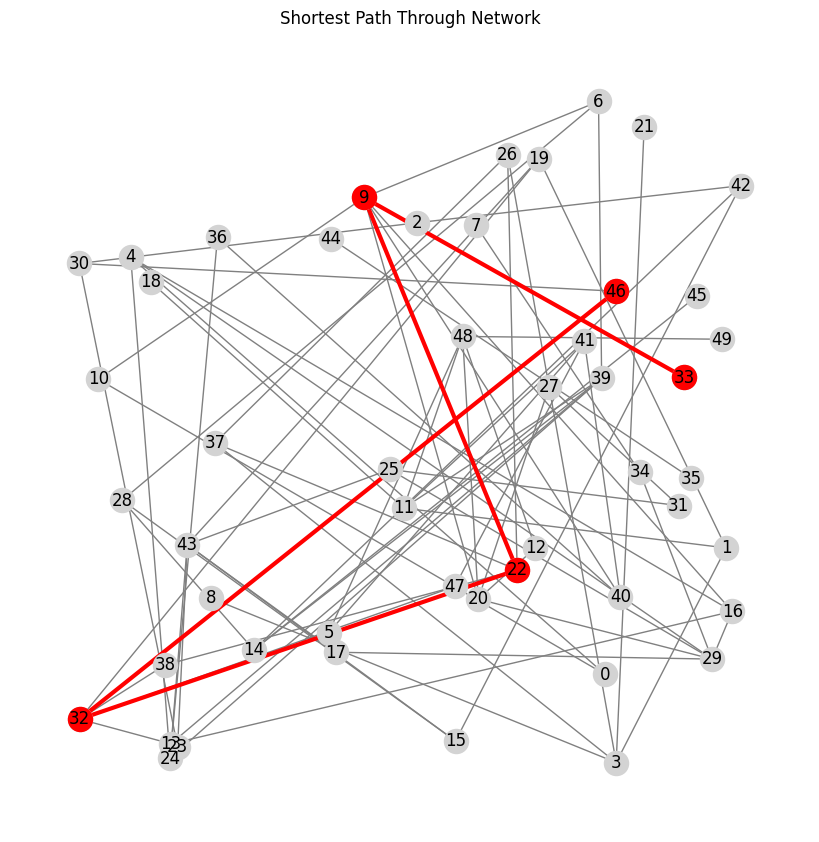

In [7]:
start, end = np.random.randint(0, N, 2)  # Random start and end nodes
path, _ = dijkstra_fib_heap(G, start, end)

print(f"Shortest Path from {start} to {end}: {path}")

# Plot the graph and animate shortest path
plot_network(G, stops, path)
plt.show()